In [1]:
# Facebook page analysis: time of day aspect
import pandas as pd

In [2]:
# load facebook dataset: Australian cosmetics company page
df = pd.read_csv("https://raw.githubusercontent.com/multidis/hult-social-media-analytics/main/data/brand_posts.csv")
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...


In [3]:
# example subset of entries: post creation timestamp
df.sort_values(by='haha_count', ascending=False).head(10)['created_time']

2016    2016-12-01 16:00:00
1896    2016-07-11 18:45:00
1845    2016-05-09 17:50:00
2037    2017-01-04 20:00:00
2013    2016-11-28 16:29:01
1852    2016-05-17 19:54:00
1838    2016-04-29 18:10:00
1898    2016-07-13 17:05:01
1969    2016-10-14 20:30:00
1972    2016-10-16 17:00:00
Name: created_time, dtype: object

In [4]:
# it is comvenient to convert timestamps to datetime-format
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
tstamps = pd.to_datetime(df.sort_values(by='haha_count', ascending=False).head(10)['created_time'])
tstamps

2016   2016-12-01 16:00:00
1896   2016-07-11 18:45:00
1845   2016-05-09 17:50:00
2037   2017-01-04 20:00:00
2013   2016-11-28 16:29:01
1852   2016-05-17 19:54:00
1838   2016-04-29 18:10:00
1898   2016-07-13 17:05:01
1969   2016-10-14 20:30:00
1972   2016-10-16 17:00:00
Name: created_time, dtype: datetime64[ns]

In [5]:
# extract only the time of day part
tstamps.dt.time

2016    16:00:00
1896    18:45:00
1845    17:50:00
2037    20:00:00
2013    16:29:01
1852    19:54:00
1838    18:10:00
1898    17:05:01
1969    20:30:00
1972    17:00:00
Name: created_time, dtype: object

In [6]:
# extract the hour of the day
tstamps.dt.hour

2016    16
1896    18
1845    17
2037    20
2013    16
1852    19
1838    18
1898    17
1969    20
1972    17
Name: created_time, dtype: int64

Text(0, 0.5, 'count')

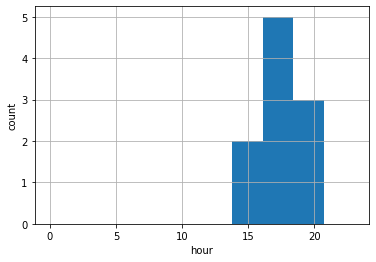

In [7]:
hist_plot = tstamps.dt.hour.hist(range=[0, 23])
hist_plot.set_xlabel('hour')
hist_plot.set_ylabel('count')